Abhishek R

ashek6578@gmail.com

batch number : DS2310      

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('food_Train.csv')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
avg_cost_by_city = df.groupby('CITY')['COST'].mean().reset_index()
avg_cost_by_city

,CITY,COST
0,10th avenue,300.0
1,1st Stage,200.0
2,1st Tavarekere,400.0
3,3rd Street,1200.0
4,5th Main Teachers Colony Koramangala Block 1 B...,200.0
...,...,...
354,navi mumbai,1600.0
355,opp gurudwara Shakurpur,100.0
356,opp mukteshwar ashram powai,800.0
357,p.o Kochi,350.0


In [4]:
df1 = pd.read_csv('Data_Test (3).csv')

In [5]:
df1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [6]:
df1.isna().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [7]:
df3 = pd.concat([df, df1], axis = 0)

In [8]:
df3

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df3['TITLE'] = label_encoder.fit_transform(df3['TITLE'])

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  int32  
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 1.2+ MB


In [11]:
df3['CUISINES'] = label_encoder.fit_transform(df3['CUISINES'])

In [12]:
df3['TIME'] = label_encoder.fit_transform(df3['TIME'])

In [13]:
df3['CITY'] = label_encoder.fit_transform(df3['CITY'])

In [14]:
df3['LOCALITY'] = label_encoder.fit_transform(df3['LOCALITY'])

In [17]:
df3['VOTES'] = df3['VOTES'].str.extract('(\d+)').astype(float)

In [18]:
df3['VOTES'].fillna(0, inplace = True)
df3['VOTES'] = df3['VOTES'].astype(int)
votes_mode = df['VOTES'].mode()[0]
df['VOTES'] = df['VOTES'].replace(0, votes_mode)

In [19]:
df3['RATING'] = df3['RATING'].replace(['-','NEW'] , 0)
df3['RATING'].fillna(0, inplace=True)
votes_mode = df['RATING'].mode()[0]
df['RATING'] = df['RATING'].replace(0, votes_mode)
df3['RATING'] = df3['RATING'].astype(float)

In [22]:
df3.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4231
dtype: int64

In [23]:
df3

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,34,9438,3294,898,400,328,3.6,49,1200.0
1,36,13198,364,2301,75,1214,4.2,30,1500.0
2,34,10915,3729,806,75,1272,3.8,221,800.0
3,104,6346,5156,340,277,161,4.1,24,800.0
4,55,15387,2218,750,277,709,3.8,165,300.0
...,...,...,...,...,...,...,...,...,...
4226,34,9057,4259,290,316,1184,3.9,287,NaN
4227,95,1247,785,750,42,461,4.3,469,NaN
4228,104,8617,2089,2896,128,1370,3.7,53,NaN
4229,104,6485,4580,605,216,642,0.0,0,NaN


In [24]:
dfe1 = df3.iloc[:12690]
dfe2 = df3.iloc[12691:]

In [25]:
df3.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [26]:
df3.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4231
dtype: int64

In [27]:
dfe2.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4230
dtype: int64

In [28]:
dfe2

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
1,104,12680,4879,2548,277,429,4.2,61,NaN
2,34,1411,4333,614,277,774,3.8,350,NaN
3,95,204,631,2955,128,846,3.8,1445,NaN
4,104,13453,4891,586,216,570,3.6,23,NaN
5,74,4518,2819,1934,160,166,3.7,36,NaN
...,...,...,...,...,...,...,...,...,...
4226,34,9057,4259,290,316,1184,3.9,287,NaN
4227,95,1247,785,750,42,461,4.3,469,NaN
4228,104,8617,2089,2896,128,1370,3.7,53,NaN
4229,104,6485,4580,605,216,642,0.0,0,NaN


<Axes: >

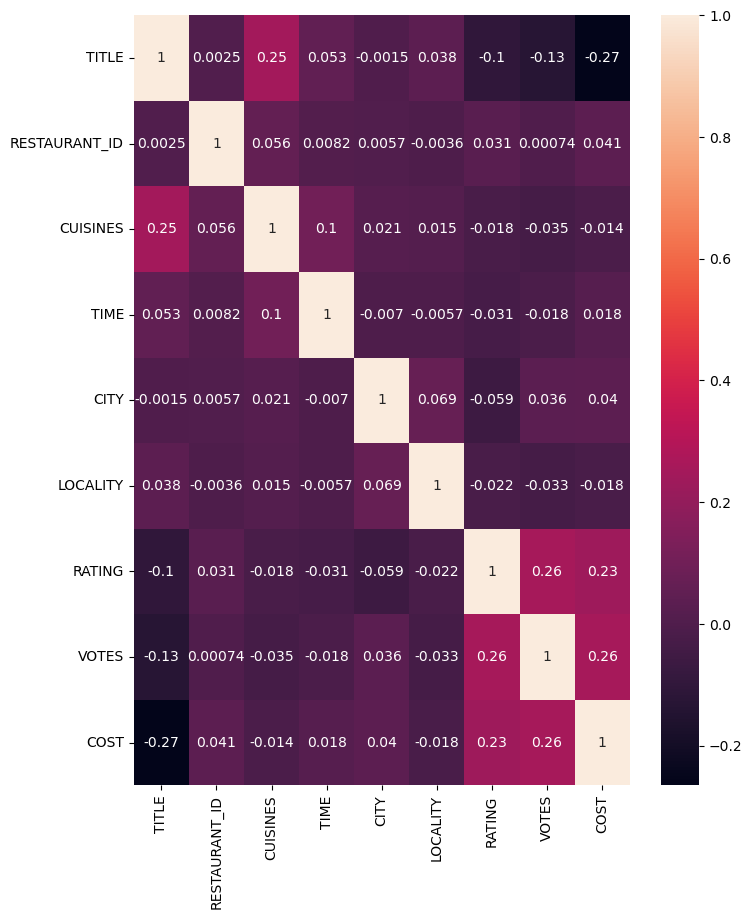

In [29]:
plt.figure(figsize = (8, 10))
sns.heatmap(dfe1.corr(), annot = True)

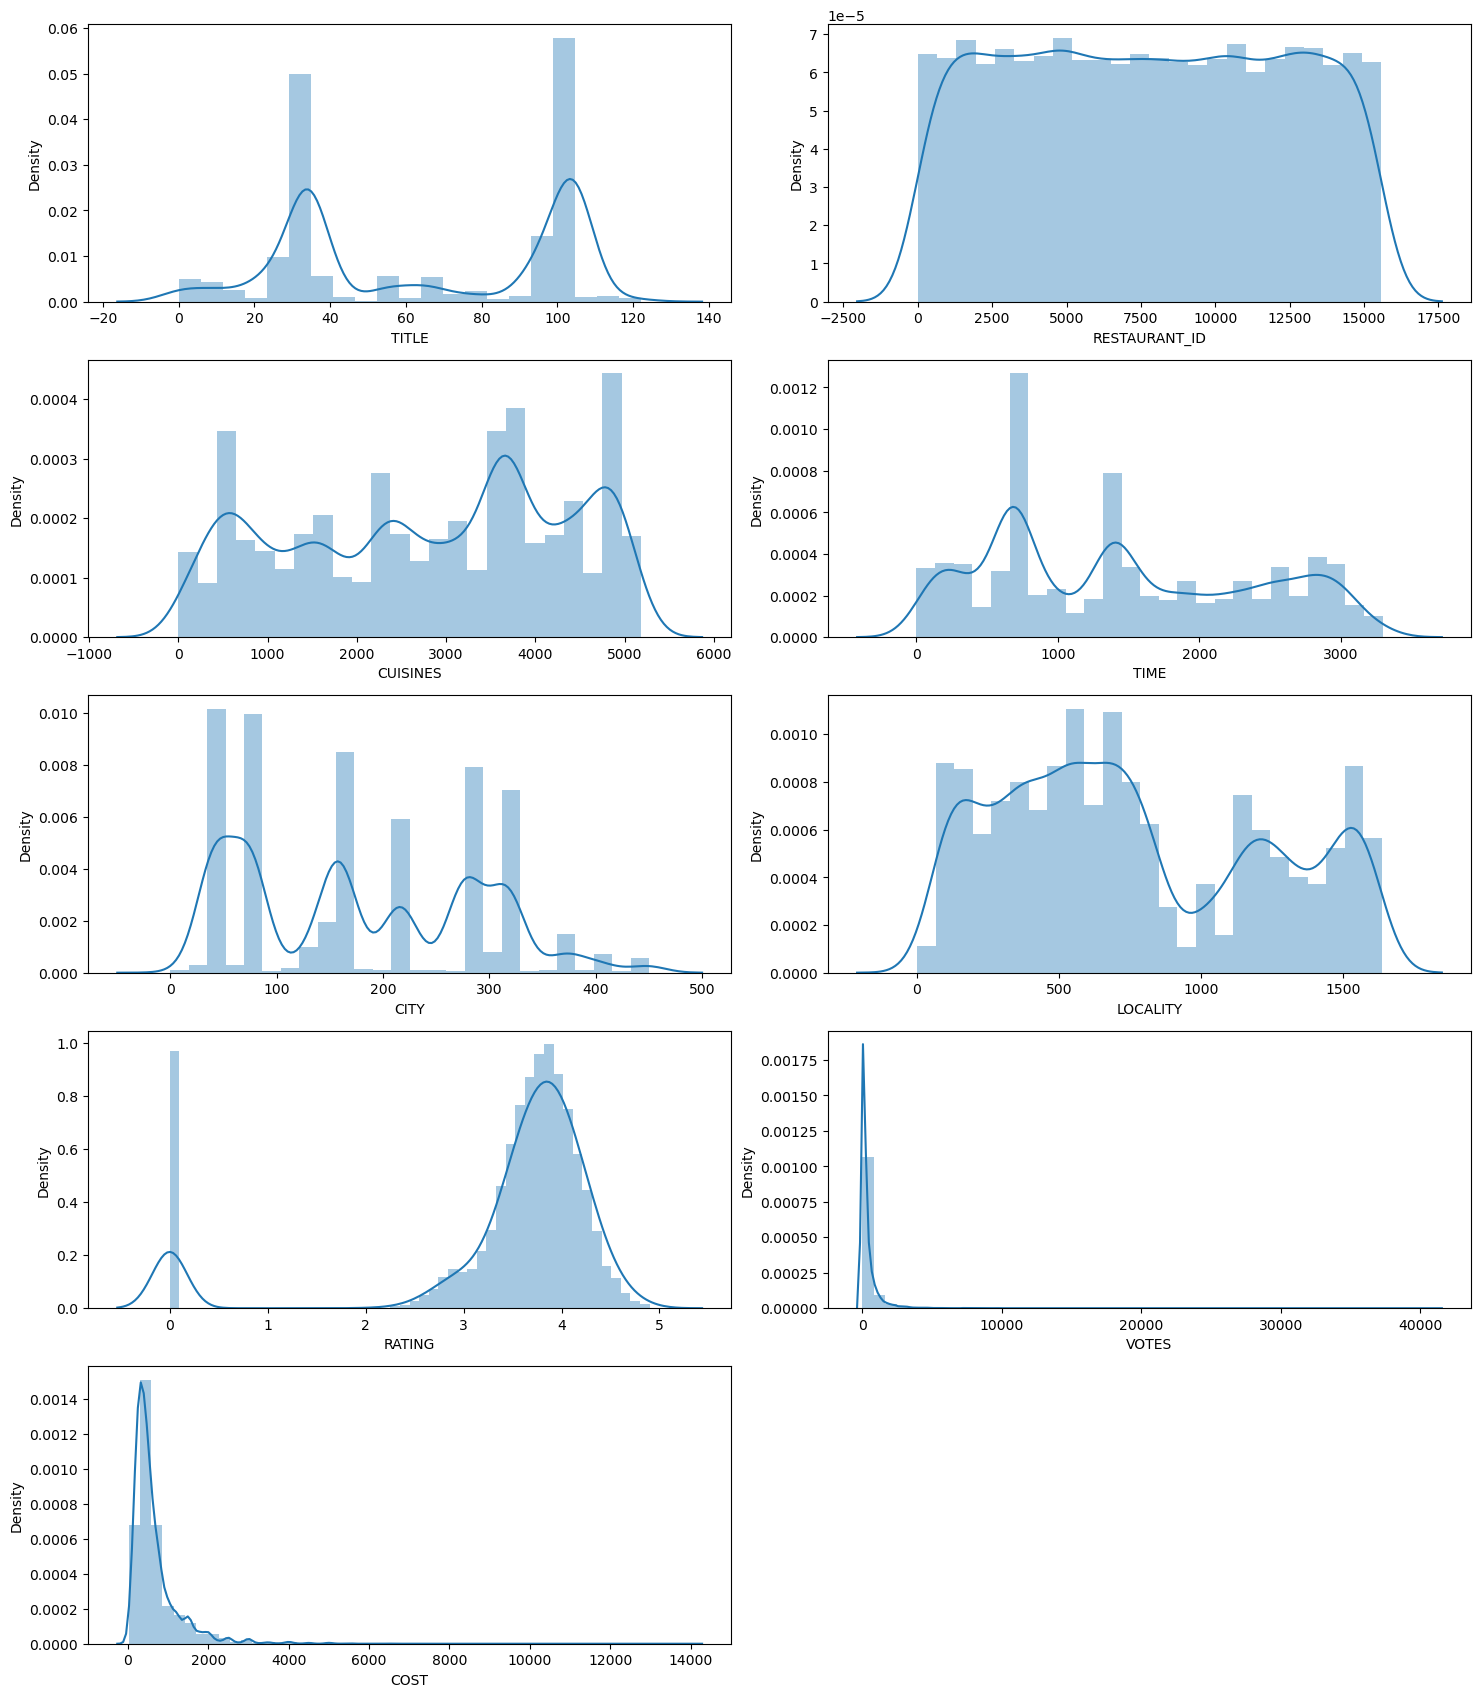

In [30]:
plt.figure(figsize=(15, 20))
a = 1 

for i in dfe1.columns:
    if a <= 12:
        plt.subplot(6, 2, a)
        sns.distplot(dfe1[i])
        plt.xlabel(i)
        a += 1

plt.tight_layout() 
plt.show()

In [31]:
x = dfe1.drop(['COST','RESTAURANT_ID'], axis = 1)
y = dfe1['COST']

In [32]:
xs = StandardScaler().fit_transform(x)

In [33]:
xs = pd.DataFrame(xs)

In [34]:
xs

,0,1,2,3,4,5,6
0,-0.866954,0.326821,-0.593102,2.017495,-0.935373,0.147237,-0.403533
1,-0.811157,-1.612830,0.926532,-0.936292,0.972438,0.655819,-0.426964
2,-0.866954,0.614790,-0.692750,-0.936292,1.097329,0.316765,-0.191427
3,1.085923,1.559460,-1.197490,0.899600,-1.294972,0.571055,-0.434363
4,-0.281091,-0.385487,-0.753406,0.899600,-0.114971,0.316765,-0.260485
...,...,...,...,...,...,...,...
12685,1.085923,0.579704,-0.048287,-0.163763,-0.791103,0.316765,0.209355
12686,-0.811157,-0.076997,-0.000629,0.899600,-1.301431,0.740582,1.033116
12687,0.388467,-0.121351,-0.059118,1.108637,1.691636,0.486292,0.285812
12688,-0.866954,1.058990,0.864793,-0.936292,-0.091285,0.062474,-0.424497


In [35]:
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.30, random_state=162)

In [36]:
regressor = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),
             GradientBoostingRegressor(),SVR(),KNeighborsRegressor()]

In [37]:
def metric_score(rg, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_score = rg.predict(x_train)
        result_type = "train"
    else:
        y_score = rg.predict(x_test)
        result_type = "test"

    mse = mean_squared_error(y_train if train else y_test, y_score)
    r2 = r2_score(y_train if train else y_test, y_score) * 100
    
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} R2 score: {r2:.2f}%')
    print(f'{result_type}  MSE : {mse:.4f}')


In [38]:
for rg in regressor:
    print(f'\n================== {rg.__class__.__name__} ==================')
    rg.fit(x_train, y_train)
    metric_score(rg, x_train, x_test, y_train, y_test, train=True)
    metric_score(rg, x_train, x_test, y_train, y_test, train=False)


================== LinearRegression ==================

 ============ train result ==========
train R2 score: 13.82%
train  MSE : 356312.2016

 ============ test result ==========
test R2 score: 18.04%
test  MSE : 283152.7805

================== DecisionTreeRegressor ==================

 ============ train result ==========
train R2 score: 100.00%
train  MSE : 3.4241

 ============ test result ==========
test R2 score: 49.81%
test  MSE : 173370.7318

================== RandomForestRegressor ==================

 ============ train result ==========
train R2 score: 95.87%
train  MSE : 17065.9307

 ============ test result ==========
test R2 score: 71.40%
test  MSE : 98806.2817

================== AdaBoostRegressor ==================

 ============ train result ==========
train R2 score: -33.77%
train  MSE : 553077.4579

 ============ test result ==========
test R2 score: -53.83%
test  MSE : 531415.7319

================== GradientBoostingRegressor ==================

 ============ train

In [39]:
for rg in regressor:
    cv = cross_val_score(rg, x, y, cv = 5)
    print('===========',rg, '==============')
    print('cv mean' ,cv.mean())
    a = rg.predict(x_test)
    print('diff between r2 score and cv score', (r2_score(y_test, a ) - cv.mean() ))

=========== LinearRegression() ==============
cv mean 0.14121458068427245
diff between r2 score and cv score 0.03914619921419721
=========== DecisionTreeRegressor() ==============
cv mean 0.4726402073873802
diff between r2 score and cv score 0.025505453999059347
=========== RandomForestRegressor() ==============
cv mean 0.7216728984050819
diff between r2 score and cv score -0.007686348398784237
=========== AdaBoostRegressor() ==============
cv mean -0.3671172347664661
diff between r2 score and cv score -0.17116600300291812
=========== GradientBoostingRegressor() ==============
cv mean 0.6977959195263971
diff between r2 score and cv score 0.013970471362146797
=========== SVR() ==============
cv mean -0.012140860575033075
diff between r2 score and cv score 0.09419945685834721
=========== KNeighborsRegressor() ==============
cv mean 0.19300679010112018
diff between r2 score and cv score 0.24384808278638118


* from the above observation i liked to move with the random forest regressor for the hyper para meter tuning 

In [40]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
rf_reg = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


In [41]:
final  = RandomForestRegressor(max_depth=20,
 min_samples_leaf= 4,
 min_samples_split=10,
 n_estimators= 200)
final.fit(x_train, y_train)
pred = final.predict(x_test)
ac = r2_score(y_test, pred)
ac * 100

73.5005429971168

In [42]:
import joblib
joblib.dump(final, "food_cost.pkl")

['food_cost.pkl']

In [45]:
dfe2 = dfe2.drop('COST', axis = 1)
dfe2 = dfe2.drop('RESTAURANT_ID', axis = 1)
dfe2

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
1,104,4879,2548,277,429,4.2,61
2,34,4333,614,277,774,3.8,350
3,95,631,2955,128,846,3.8,1445
4,104,4891,586,216,570,3.6,23
5,74,2819,1934,160,166,3.7,36
...,...,...,...,...,...,...,...
4226,34,4259,290,316,1184,3.9,287
4227,95,785,750,42,461,4.3,469
4228,104,2089,2896,128,1370,3.7,53
4229,104,4580,605,216,642,0.0,0


In [46]:
load = joblib.load("food_cost.pkl")
pd1 = load.predict(dfe2)

In [47]:
dfe2['COST'] = pd1

In [48]:
dfe2.to_csv('dfe2.csv', index=False) #saving data frame 

In [49]:
dfe2

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
1,104,4879,2548,277,429,4.2,61,437.724790
2,34,4333,614,277,774,3.8,350,437.724790
3,95,631,2955,128,846,3.8,1445,437.724790
4,104,4891,586,216,570,3.6,23,437.724790
5,74,2819,1934,160,166,3.7,36,437.724790
...,...,...,...,...,...,...,...,...
4226,34,4259,290,316,1184,3.9,287,437.724790
4227,95,785,750,42,461,4.3,469,437.724790
4228,104,2089,2896,128,1370,3.7,53,437.724790
4229,104,4580,605,216,642,0.0,0,418.493588
